## Αναγνώρηση προτύπων
### 2η Εργασία
Κωτούλας Εμμανουήλ 9697


In [40]:
# αρχικά γίνονται imported οι βιβλιοθήκες που θα χρειαστούν
import numpy as np
import math
import matplotlib.pyplot as plt

In [41]:
# ορίζονται 2 πίνακες με τα δεδομένα που δίνονται στην εκφώνηση

D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])

D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# αυτό το θεωρώ περιττό ωστόσο για να παρομοιάσω ένα συνηθισμένο σύστημα έκανα έναν πίνακα με όλα τα δεδομένα και έναν πίνακα με labels

D = np.append(D1,D2)

# labels ανάλογα με το που ανήκει
Dlabels = []

for d in D :
    if d in D1 :
        Dlabels.append(0)
    elif d in D2 :
        Dlabels.append(1)


### Μέρος Α
Όπως προτείνεται και στην εκφώνηση δημιουργήθηκαν 2 κλάσεις, μία για κάθε μεθοδολογία εκτίμισης παραμέτρων.  

Η πρώτη, MaxLikeEstimationClassifier, είναι μια κλάση που υλοποιεί την εκτίμηση μέγιστης πιθανοφάνειας.
Περιέχει 2 μεταβλητές για την αποθήκευση των εκτιμήσεων μετά το training.  

Οι συναρτήσεις p και pProd είναι υπεύθυνες για τον υπολογισμό της εξίσωσης που δίνεται στην εκφώνηση, η p για μία τιμή x και θ (theta) και η pProd για ένα διάνυσμα D.  

Η plotLogs δημιουργεί τα plots που ζητούνται στο πρώτο ερώτημα.  

Η fit καλεί την pProd για ένα range από theta και βρίσκει αυτό για το οποίο έχει μέγιστο product για το διάνυσμα D. Αυτό γίνεται και για τα δύο D, τα D1 και D2.  

Τέλος υπάρχουν οι predict και η predictKnown οι οποίες εκτελουν τις ίδιες πράξεις ώστε να γίνει το classification σύμφωνα με την συνάρτηση διάκρισης που δίνεται στην εκφώνηση
ωστόσο η predictKnown χρησιμοποιείται εδώ για ευκολία εκτύπωσης των αποτελεσμάτων (με διαφορετικά χρώματα πιο εύκολα) καθώς ήδη γνωρίζουμε το classification των δεδομένων και θέλουμε
να δούμε πόσο καλή δουλειά κάνει. Για ένα πραγματικά άγνωστο διάνυσμα D χρησιμοποιείται η predict.

In [42]:
class MaxLikeEstimationClassifier:

    # initialization of the variables theta1 and 2
    def __init__(self):
        self.theta1 = 0
        self.theta2 = 0

    # Η συνάρτηση αυτή υπολογίζει την τιμή της πυκνότητας πιθανότητας που βρήκε ο συνάδελφος
    def p(self, x, theta):
        return (1/math.pi)*(1/(1+ (x-theta)*(x-theta) ))

    # Η συνάρτηση αυτή υπολογίζει την τιμή της p για ένα διάνυσμα D εκτελώντας τον πολλαπλασιασμό που απαιτείται απο την θεωρία
    def pProd(self, D, theta):
        product = 1
        for x in D :
            product = product*self.p(x,theta)
        return product
    
    # Η συνάρτηση αυτή υπολογίζει τις 2 γραφικές που απαιτούνται στο πρώτο ερώτημα καλώντας την pProd για διάφορα θ
    def plotLogs(self, D, Dlabels,theta):

        # ορίζονται 2 άδειοι πίνακες για τις τιμές των δύο    
        d1Values = []
        d2Values = []

        # με τον ίδιο τρόπο που έγινε το encoding των labels γίνεται τώρα το decoding για αυτό το θεώρησα περιττό με τον τρόπο που υλοποίησα τον κώδικα μου
        D1 = []
        D2 = []

        for d in range(len(D)) :
            if Dlabels[d] == 0 :
                D1.append(D[d])
            else :
                D2.append(D[d])

        # μια for διατρέχει όλα τα στοιχεία της theta που περιέχει μεγάλο αριθμό τιμών και κάνει append τα αποτελέσματα στους πίνακες που ορίστηκαν
        for th in theta :
            d1Values.append( math.log(self.pProd(D1,th)) )
            d2Values.append( math.log(self.pProd(D2,th)) )

        # δημιουργείται η γραφική παράσταση 
        plt.plot(theta, d1Values)
        plt.plot(theta, d2Values)
        plt.show()
        

    def fit(self, D, Dlabels, theta):

        # με τον ίδιο τρόπο με την plotLogs υπολογίζονται οι πίνακες d1Values και d2Values ώστε να βρεθεί η εκτίμηση για κάθε μια απο τις συναρτήσεις ?????????????????????????????????
        d1Values = []
        d2Values = []

        # με τον ίδιο τρόπο που έγινε το encoding των labels γίνεται τώρα το decoding για αυτό το θεώρησα περιττό με τον τρόπο που υλοποίησα τον κώδικα μου
        D1 = []
        D2 = []

        for d in range(len(D)) :
            if Dlabels[d] == 0 :
                D1.append(D[d])
            else :
                D2.append(D[d])

        for th in theta :
            d1Values.append(self.pProd(D1,th))
            d2Values.append(self.pProd(D2,th))

        # καλείται η max ώστε να βρεθούν οι μέγιστες τιμές και έπειτα η .index για να βρεθούν τα δύο θ, theta1 και theta2
        maxD1 = max(d1Values)
        maxD2 = max(d2Values)

        self.theta1 = theta[d1Values.index(maxD1)]
        self.theta2 = theta[d2Values.index(maxD2)]

        # τέλος καλείται η plotLogs για να γίνει προφανής η θέση των θ
        self.plotLogs(D, Dlabels, theta)


    # Η predict και η predictKnown λειτουργούν με τον ίδιο τρόπο όπως εξήγησα και παραπάνω
    def predict(self, D, P1, P2) :
        # ορίζεται ένας άδειος πίνακας για τις τιμές που θα βρεθούν
        g = []
        
        for x in D :
            # για κάθε χ υπολογίζεται η τιμή της συνάρτησης διάκρισης που δίνεται από την εκφώνηση 
            g.append( math.log(self.p(x, self.theta1)) - math.log(self.p(x, self.theta2)) + math.log(P1) - math.log(P2)) 

        return g
    


    def predictKnown(self, D1, D2, P1, P2):
        
        g1 = []

        for x in D1 :
            
            g1.append( math.log(self.p(x, self.theta1)) - math.log(self.p(x, self.theta2)) + math.log(P1) - math.log(P2)) 

        g2 = []
        for x in D2 :
            g2.append( math.log(self.p(x, self.theta1)) - math.log(self.p(x, self.theta2)) + math.log(P1) - math.log(P2)) 

        return g1, g2
    


Αρχικά ορίζεται ο classifier και καλείται την fit με theta απο -7 έως 6 με 1000 τιμές

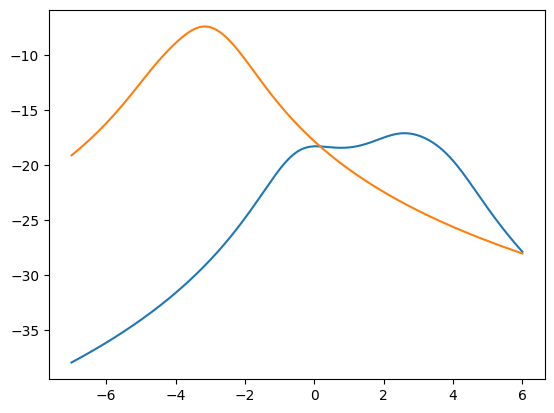

In [43]:
theta = np.linspace(-7,6,1000)

maxlike = MaxLikeEstimationClassifier()

maxlike.fit(D, Dlabels, theta)

Για την ταξινόμηση των συνόλων καλείται η predictKnown και τα αποτελέσματα τυπόνονται παρακάτω

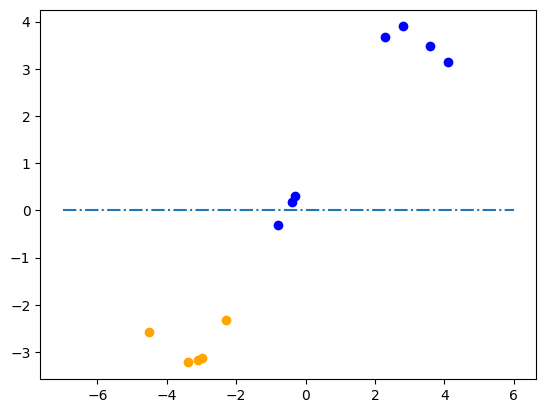

In [44]:
y1, y2 = maxlike.predictKnown(D1, D2, 7/12, 5/12)

# ορίζουμε μια γραμμή στο 0 ώστε να δούμε καλύτερα την απόδοση του ταξινομητή
xLine = np.linspace(-7,6,100)
yLine = [0 for x in xLine]
plt.plot(xLine,yLine,linestyle="dashdot")

# και κάνουμε plot τα σημεία
plt.scatter(D1,y1,color="blue")
plt.scatter(D2,y2,color="orange")
plt.show()

Το πρόσιμο της g φαίνεται να είναι επαρκώς αρνητικό για τα αρνητικά x και επαρκώς θετικό για τα θετικά χ ώστοσο το πρόσιμο είναι πολύ κοντά στο 0 για τα σημεία που είναι γύρω απο το 0.  
Ο κανόνας απόφασης δεδομένης της συνάρτησης g ορίζεται ώς τα σημεία πάνω από το 0 να ταξινομούνται ως της κλάσης 1 ενώ αυτά με αρνητικό g στην κλάση 2.  
Με βάση αυτόν τον κανόνα παρατηρείται οτι τα σημεία με χ πολύ κοντά στο 0 έχουν g πολύ κοντά στο 0 και ένα απο αυτά έχει ταξινομηθεί λανθασμένα.

### Μέρος Β
Με παρόμοιο τρόπο με τον classifier του πρώτου μέρους ορίζεται και ο classifier που χρησιμοποιεί Bayes Estimation.  

Ορίζεται μια κλάση η BayesEstimationClassifier η οποία περιέχει της p και pProd όπως ορίστηκαν και παραπάνω.  

Η συνάρτηση pTheta υπολογίζει τη συνάρτηση πυκνότητας πιθανότητας της θ.  

Η συνάρτηση pThetaDPlot υπολογίζει το p(θ|D) από την θεωρία και παράγει τα απαραίτητα plots.

Η συνάρτηση pXD υπολογίζει το p(x|D) από την θεωρία.  

Η συναρτήσεις predict και predictKnow υπολογίζουν την συνάρτηση διάκρισης που δίνεται ώστε να γίνει το classification. Η predictKnown υπάρχει για λόγους ευκολίας όπως και στην παραπάνω κλάση.



In [45]:
class BayesEstimationClassifier :

    # initialization of the variables D1 and D2
    def __init__(self):
        self.D1 = []
        self.D2 = []

    # Η συνάρτηση αυτή υπολογίζει την τιμή της πυκνότητας πιθανότητας που βρήκε ο συνάδελφος
    def p(self, x, theta):
        return (1/math.pi)*(1/(1+ (x-theta)*(x-theta) ))

    # Η συνάρτηση αυτή υπολογίζει την τιμή της p για ένα διάνυσμα D εκτελώντας τον πολλαπλασιασμό που απαιτείται απο την θεωρία
    def pProd(self, D, theta):
        product = 1
        for x in D :
            product = product*self.p(x,theta)
        return product

    # Η συνάρτηση αυτή υπολογ΄ίζει την τιμή τη συνάρτση τη πυκνότητας πιθανότητας της θ
    def pTheta(self, theta): 
        return 1/( 10*math.pi ) * 1/( 1 + (theta/10)*(theta/10) )
    
    # Η συνάρτηση αυτή υπολογίζει την τιμή της p(θ|D) όπως παρουσιάζεται και στην σελιδα 14 των διαφανειών
    def pThetaDPlot(self, theta, D, Dlabels):

        # αρχικοποιούνται οι μεταβλητές στις οποίες θα υπολογιστεί το ολοκλήρωμα, στην δικιά μας περίπτωση το άθροισμα
        sum1 = 0
        sum2 = 0
        # και το dθ 
        dTheta = theta[1] - theta[0]

        # ορίζονται 2 πίνακας που θα αποθηκευτούν οι τιμές ώστε να γίνουν οι γραφικές παραστάσεις που ζητούνται
        pThD1 = []
        pThD2 = []

        # με τον ίδιο τρόπο που έγινε το encoding των labels γίνεται τώρα το decoding για αυτό το θεώρησα περιττό με τον τρόπο που υλοποίησα τον κώδικα μου

        for d in range(len(D)) :
            if Dlabels[d] == 0 :
                self.D1.append(D[d])
            else :
                self.D2.append(D[d])

        # πρώτα υπολογίζεται το ολοκλήρωμα
        for th in theta :
            sum1 += dTheta*self.pProd(self.D1,th)*self.pTheta(th)
            sum2 += dTheta*self.pProd(self.D2,th)*self.pTheta(th)
        
        # έπειτα υπολογίζονται οι τιμές και αποθηκεύονται στους πίνακες που ορίστηκαν
        for th in theta :
            pThD1.append(self.pProd(self.D1,th)*self.pTheta(th)/sum1)
            pThD2.append(self.pProd(self.D2,th)*self.pTheta(th)/sum2)
        
        # ορίζεται ένας πίνακας και με list comprehension υπολογίζεται η τιμή της p(θ) για κάθε τιμή θ
        pTh = [self.pTheta(th) for th in theta]

        plt.plot(theta, pThD1, color="blue")
        plt.plot(theta, pThD2, color="red")
        plt.plot(theta, pTh, color="green")

        plt.show()
        


    def pXD(self, x, theta, D):

        # με παρόμοιο τρόπο με παραπάνω υπολογίζεται το ολοκλήρωμα
        dTheta = theta[1] - theta[0]

        sum = 0
        for th in theta :
            sum += dTheta*self.pProd(D,th)*self.pTheta(th)
        
        # και έπειτα υπολογίζεται το δεύτερο ολοκλήρωμα που βρίσκεται στην σελιδα 15 των διαφανειών
        pxD = 0

        for th in theta :
            pxD += self.p(x,th)*(self.pProd(D,th)*self.pTheta(th)/sum) * dTheta

        return pxD

    # Η predict και η predictKnown λειτουργούν με τον ίδιο τρόπο όπως εξήγησα και παραπάνω
    def predict(self, D, P1, P2, theta) :
        # ορίζεται ένας άδειος πίνακας για τις τιμές που θα βρεθούν
        h = []

        for x in D :
            # για κάθε χ υπολογίζεται η τιμή της συνάρτησης διάκρισης που δίνεται από την εκφώνηση 
            h.append( math.log(self.pXD(x, theta, self.D1)) - math.log(self.p(x, theta, self.D2)) + math.log(P1) - math.log(P2)) 

        return h

   
    def predictKnown(self, D1, D2, P1, P2, theta):
        
        h1 = []

        for x in D1 :
            h1.append( math.log(self.pXD(x, theta, self.D1)) - math.log(self.pXD(x, theta, self.D2)) + math.log(P1) - math.log(P2)) 

        h2 = []
        for x in D2 :
            h2.append( math.log(self.pXD(x, theta, self.D1)) - math.log(self.pXD(x, theta, self.D2)) + math.log(P1) - math.log(P2)) 
        
        return h1,h2

Ορίζεται ο classifier και καλείται η pThetaDPlot με τα κατάλληλα ορίσματα ώστε να γίνει η γραφική παράσταση

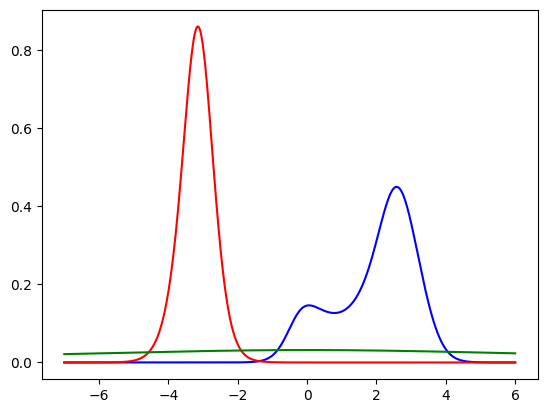

In [46]:
bayes = BayesEstimationClassifier()

# ορίζεται ένας πίνακας με θ με 1000 τιμές απο το -7 έως το 6
theta = np.linspace(-7,6,1000)

bayes.pThetaDPlot(theta, D, Dlabels)

Παρατηρείται ότι η p(θ|D1) (μπλε) και η p(θ|D2) (κόκκινη) παίρνουν πολύ μεγαλύτερες τιμές από την p(θ) (πράσινη).  
Επίσης συγκρίνοντας αυτή τη γραφική παράσταση με του πρώτου μέρους παρατηρείται ότι τα peaks ξεχωρίζουν πολύ περισσότερο.

Τέλος καλούμε την predictKnown για να δούμε τις τιμές της h και την κάνουμε plot.

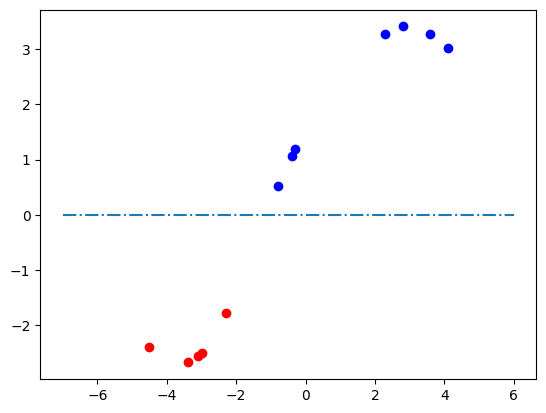

In [47]:
y1, y2 = bayes.predictKnown(D1, D2, 7/12, 5/12, theta)

# δημιουργε΄΄ιται μια διακεκομένη γραμμή καθώς περιγράφει τον κανόνα απόφασης
xLine = np.linspace(-7,6,100)
yLine = [0 for x in xLine]

# γίνονται όλα plot
plt.plot(xLine,yLine,linestyle="dashdot")

plt.scatter(D1,y1,color="blue")
plt.scatter(D2,y2,color="red")
plt.show()


Σε αυτή την περίπτωση παρατηρείται πιο καλός διαχωρισμός των σημείων και μια επαρκή απόσταση απο το 0 των σημείων με x κοντα στο 0 που ανήκουν στην κλάση 1 με όλα να είναι ταξινομημένα σωστά.  

Συγκριτικά με το αποτέλεσμα του πρώτου μέρους που χρησιμοποιήθηκε εκτίμηση μέγιστης πιθανοφάνειας παρατηρώ ότι στο δεύτερο μέρος οι τιμές κοντά στο 0 έχουν ταξινομηθεί καλύτερα και χωρίς κάποιο σφάλμα. Επίσης παρατηρείται ότι τα 5 σημεία της δεύτερης κλάσης και τα 4 σημεία της πρώτης κλάσης είναι πιο κοντά στο 0 στην δεύτερη ταξινόμηση σε σχέση με την πρώτη, ωστόσο θεωρώ ότι και στις 2 είναι επαρκώς μακρία από το 0 ώστε να μην έχει σημαντική διαφορά το γεγονός αυτό.

Η διαφορά στο συγκεκριμένο παράδειγμα οφείλεται στο γεγονός οτι η εκτίμηση μέγιστης πιθανοφάνειας πολώνεται στο μέγιστο και δεν έχει καλη απόδοση αν υπάρχει ένα μικρότερο τοπικό μέγιστο όπως υπάρχει στην περίπτωση μας γύρω από το 0. Επίσης η συνάρτηση πυκνότητας πιθανότητας του θ παρέχει επιπλέον πληροφορία στο σύστημα μας.